#Sélection du jeu de données
Le jeu de données Breast Cancer Wisconsin Diagnostic est un choix pertinent car il est largement utilisé pour des tâches réelles de classification médicale concernant le diagnostic du cancer du sein. Il provient du UCI Machine Learning Repository, ce qui garantit la qualité, la robustesse et le contexte scientifique des données. Ce dataset est plus complexe et riche que des jeux simples comme Titanic ou Iris. Il est fréquemment utilisé pour évaluer des algorithmes d'apprentissage supervisé dans un contexte médical critique.

#Définition de la problématique
C'est un problème de classification binaire supervisée. L'objectif est de prédire si une tumeur mammaire est maligne (cancéreuse) ou bénigne (non-cancéreuse) à partir de caractéristiques mesurées sur des images de cytologie.

Classes cibles : 0 = Malignant (Maligne), 1 = Benign (Bénigne).

L’enjeu est l'aide au diagnostic médical, une application vitale.

#Dictionnaire des données (métadonnées)
Taille : 569 échantillons (lignes).

Variables : 30 variables numériques descriptives (features) + 1 variable cible (target).

Types de variables : Toutes les features sont numériques continues.

Signification des variables : caractéristiques morphologiques extraites d’images de biopsies, par exemple :

mean radius : moyenne des rayons des noyaux cellulaires

mean texture : moyenne des variations de texture

mean perimeter : moyenne du périmètre

mean area : moyenne de la surface

mean smoothness : moyenne de la douceur de la surface
Target : 0 ou 1, indiquant si la tumeur est maligne ou bénigne, respectivement.
Ce dataset est adapté pour appliquer des méthodes avancées de Machine Learning sur données médicales, et il nécessite un bon prétraitement et une analyse rigoureuse car les features sont nombreuses et corrélées.Ainsi, ce choix répond bien à vos critères de pertinence, complexité et objectifs d’analyse supervisée de classification médicale.

In [1]:
pip install ucimlrepo

In [2]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)

# data (as pandas dataframes)
X = breast_cancer_wisconsin_diagnostic.data.features
y = breast_cancer_wisconsin_diagnostic.data.targets

# metadata
print(breast_cancer_wisconsin_diagnostic.metadata)

# variable information
print(breast_cancer_wisconsin_diagnostic.variables)


{'uci_id': 17, 'name': 'Breast Cancer Wisconsin (Diagnostic)', 'repository_url': 'https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic', 'data_url': 'https://archive.ics.uci.edu/static/public/17/data.csv', 'abstract': 'Diagnostic Wisconsin Breast Cancer Database.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 569, 'num_features': 30, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Diagnosis'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1993, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5DW2B', 'creators': ['William Wolberg', 'Olvi Mangasarian', 'Nick Street', 'W. Street'], 'intro_paper': {'ID': 230, 'type': 'NATIVE', 'title': 'Nuclear feature extraction for breast tumor diagnosis', 'authors': 'W. Street, W. Wolberg, O. Mangasarian', 'venue': 'Electronic imaging', 'year': 1993, 'journal': None, 'DOI': '1

In [3]:
# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

In [4]:
# 2. Load Data
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

In [5]:

# 3. Preprocessing
# - Check for duplicates and remove
data_combined = pd.concat([X, y.rename("target")], axis=1)
data_combined.drop_duplicates(inplace=True)

# - Imputation (Not necessary here since no missing values, but demonstrating advanced example)
imputer = KNNImputer(n_neighbors=5)
X_imputed = pd.DataFrame(imputer.fit_transform(data_combined.drop("target", axis=1)), columns=data.feature_names)

# - Encode target variable if needed (here target is already binary 0/1, so label encoding not needed)

# - Scale numerical features
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X_imputed), columns=data.feature_names)

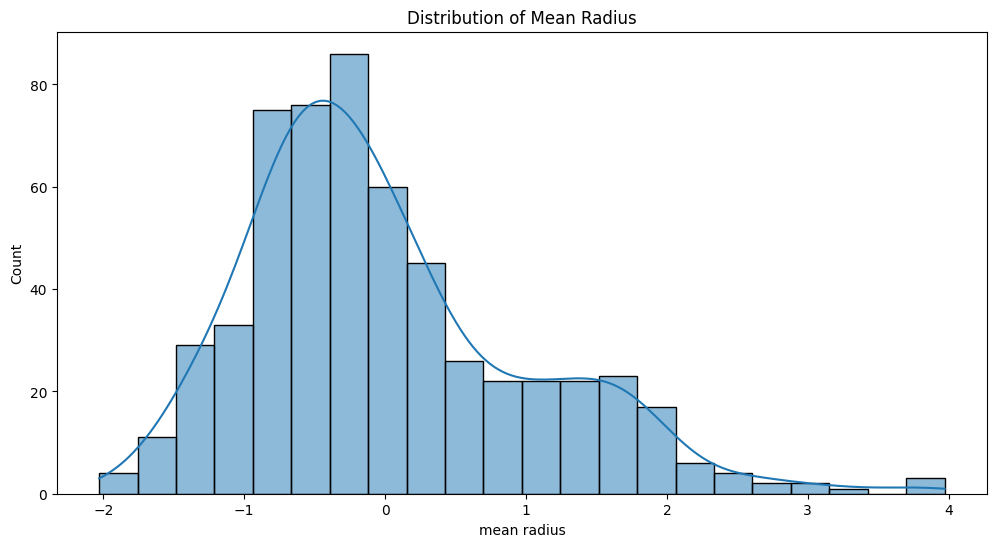

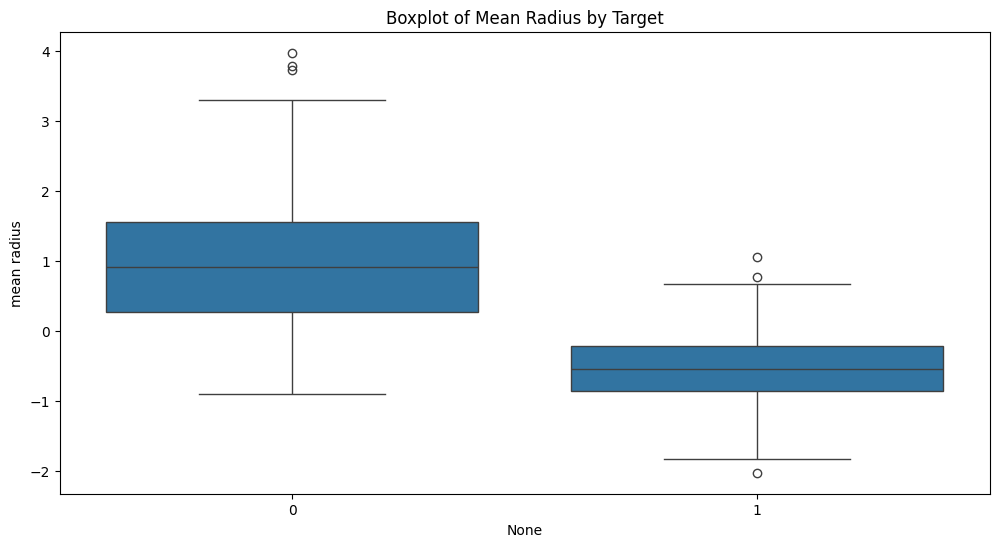

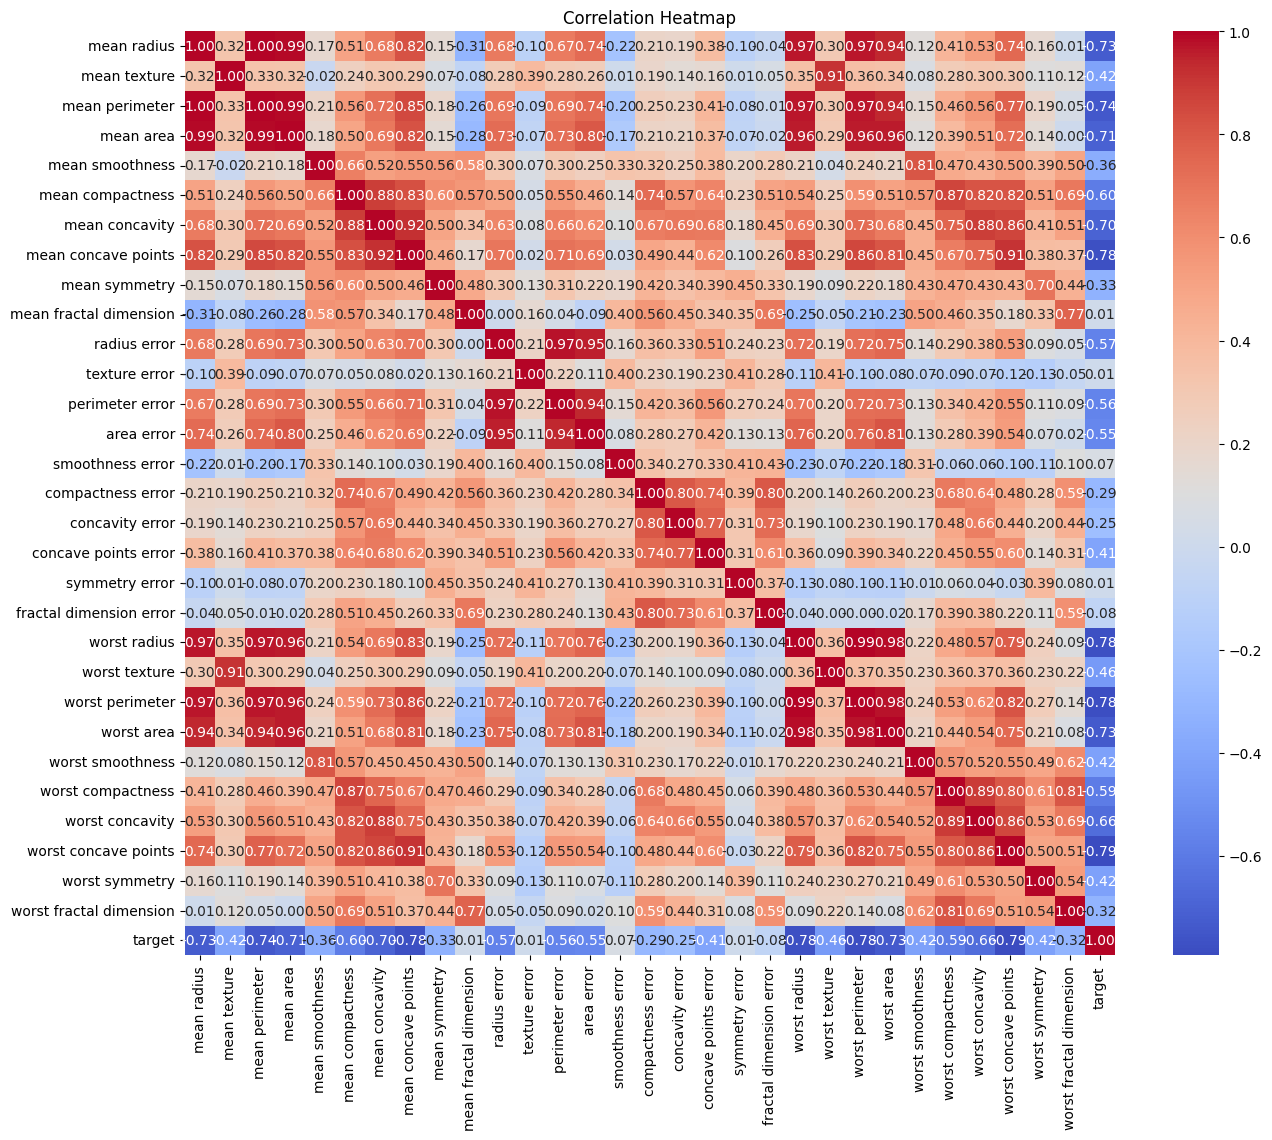

In [6]:
# 4. Exploratory Data Analysis (EDA)
# Distribution and outliers
plt.figure(figsize=(12, 6))
sns.histplot(X_scaled['mean radius'], kde=True)
plt.title('Distribution of Mean Radius')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x=y, y=X_scaled['mean radius'])
plt.title('Boxplot of Mean Radius by Target')
plt.show()

# Correlation Heatmap
plt.figure(figsize=(15, 12))
sns.heatmap(data_combined.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Comment: Mean radius shows a slightly higher spread in malignant cases (target=0). Correlation heatmap shows strong correlation between radius and perimeter features indicating feature redundancy.

In [7]:
# 5. Feature Engineering
# Example: Create new feature ratio of mean perimeter to mean area (just demonstration)
X_scaled['perimeter_area_ratio'] = X_imputed['mean perimeter'] / (X_imputed['mean area'] + 1e-6)

Logistic Regression CV Accuracy: 0.9758
Random Forest CV Accuracy: 0.9604
SVM CV Accuracy: 0.9736
Best Random Forest Params: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}
Test Set Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



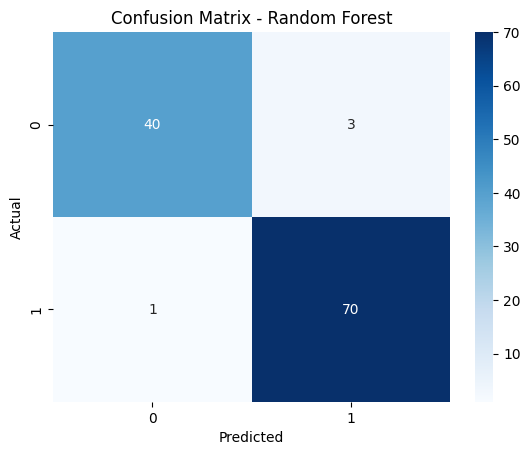

In [8]:
# 6. Modeling
# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define models to test
models = {
    'Logistic Regression': LogisticRegression(max_iter=10000),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(probability=True, random_state=42)
}

# Cross-validation results dictionary
cv_results = {}

for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    cv_results[name] = scores.mean()
    print(f"{name} CV Accuracy: {scores.mean():.4f}")

# Hyperparameter tuning example for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5]
}

grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='accuracy')
grid_rf.fit(X_train, y_train)

print("Best Random Forest Params:", grid_rf.best_params_)

# Evaluate best model on test set
best_rf = grid_rf.best_estimator_
y_pred = best_rf.predict(X_test)
print("Test Set Classification Report (Random Forest):")
print(classification_report(y_test, y_pred))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap='Blues')
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()